## Download Compustat data from WRDS

-------------------------

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wrds

### Connect WRDS

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


### Download funda from Compustat

In [3]:
df= conn.raw_sql(f"""select conm, gvkey, cik, tic, datadate, au, fyear, at, lt, sale,  ni, ib, oancf, sich, prcc_f * csho as mv
                    from comp.funda a
                    
                    where a.fyear >= 1990 and 
                        a.fyear <= 2020 and
                        a.indfmt= 'INDL' and 
                        a.datafmt = 'STD' and 
                        a.popsrc= 'D' and 
                        a.consol = 'C' and
                        (a.sich < 6000 or a.sich > 6999)
                    """)
df= df.sort_values(['gvkey','datadate'])
df['fyear']= df['fyear'].astype(int)
df['lev']= df['lt'] / df['at']
df= df.reset_index(drop=True)
print(df.shape)
df.head()

(211989, 16)


,conm,gvkey,cik,tic,datadate,au,fyear,at,lt,sale,ni,ib,oancf,sich,mv,lev
0,AAR CORP,001004,0000001750,AIR,1991-05-31,6,1990,379.958,186.180,466.542,14.801,14.801,36.891,5080.0,224.460360,0.490002
1,AAR CORP,001004,0000001750,AIR,1992-05-31,6,1991,395.351,198.614,422.657,10.020,10.020,8.814,5080.0,204.699595,0.502374
2,AAR CORP,001004,0000001750,AIR,1993-05-31,6,1992,365.151,175.935,382.780,0.283,0.283,16.806,5080.0,214.663477,0.481814
3,AAR CORP,001004,0000001750,AIR,1994-05-31,6,1993,417.626,228.138,407.754,9.494,9.484,6.697,5080.0,228.648720,0.546273
4,AAR CORP,001004,0000001750,AIR,1995-05-31,6,1994,425.814,228.695,451.395,10.463,10.463,15.255,5080.0,243.405235,0.537077


---------------------

## Check data with visualization

### Distribution by years

<AxesSubplot:xlabel='fyear'>

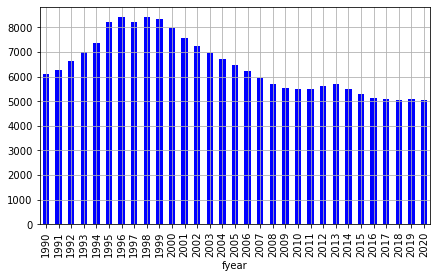

In [4]:
df.groupby(['fyear']).count()['cik'].plot(kind='bar', figsize=(7,4), grid= True, color= 'b')

### Sum of total assets, Revenues, and MV by years

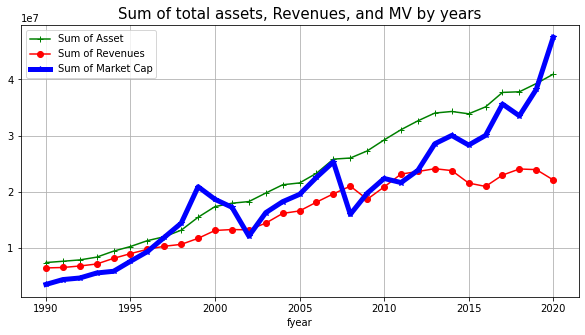

In [5]:
df.groupby(['fyear']).sum()['at'].plot(kind='line', color= 'g', marker='+', label= 'Sum of Asset')
df.groupby(['fyear']).sum()['sale'].plot(kind='line', color= 'r', marker='o', label= 'Sum of Revenues')
df.groupby(['fyear']).sum()['mv'].plot(kind='line', figsize=(10,5), grid= True, color= 'b', marker='*', lw= 5, label= 'Sum of Market Cap')
plt.legend()
plt.title("Sum of total assets, Revenues, and MV by years", fontsize= 15)
plt.show()

<em>Sum of MV decreased in 2000 (DotCom bubble) and 2008 (Financial Crisis) substantially.</em>

### Sum of Net Income and Operating Cash Flows

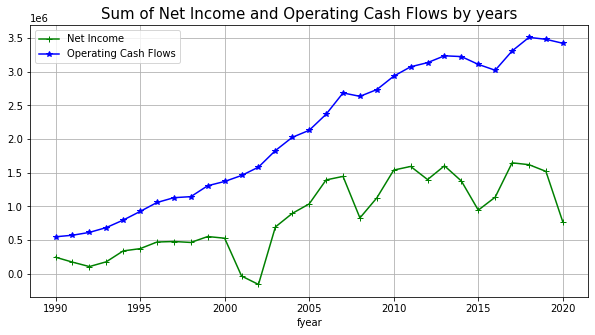

In [6]:
df.groupby(['fyear']).sum()['ni'].plot(kind='line', color= 'g', marker='+', label= 'Net Income')
df.groupby(['fyear']).sum()['oancf'].plot(kind='line', figsize=(10,5), grid= True, color= 'b', marker='*', label= 'Operating Cash Flows')
plt.legend()
plt.title("Sum of Net Income and Operating Cash Flows by years", fontsize= 15)
plt.show()

-------------

### Save to .csv

In [7]:
df.to_csv("data/compustat_from_1990.csv", index= None)

### Close connection

In [8]:
conn.close()